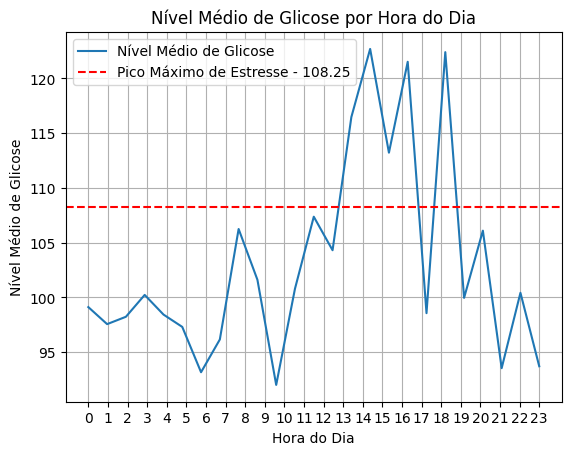

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Função para simular a coleta de dados de glicose ao longo de um período de tempo
def simulate_glucose(duration_minutes, sample_interval_seconds, stress_times):
    # Inicialize uma lista para armazenar os níveis de glicose
    glucose_levels = []
    
    # Defina o tempo total de simulação em segundos
    total_duration_seconds = duration_minutes * 60
    
    # Defina o tempo inicial da simulação
    start_time = time.time()
    
    # Simule a coleta de dados de glicose até atingir a duração total
    while time.time() - start_time < total_duration_seconds:
        # Calcule o tempo decorrido desde o início da simulação
        elapsed_time = time.time() - start_time
        
        # Calcule o número de minutos decorridos desde o início da simulação
        elapsed_minutes = elapsed_time / 60
        
        # Calcule o número da hora atual ajustado para representar 24 horas
        current_hour = (elapsed_minutes / duration_minutes) * 24
        
        # Calcule o nível de glicose para esta hora
        if current_hour <= 6:  # Estabilizar as primeiras 6 horas
            glucose_level = 100 + np.random.normal(0, 5)
        else:
            glucose_level = 100 + np.random.normal(0, 20)
        
        # Verifique se há um pico de estresse neste momento
        for stress_time in stress_times:
            if current_hour >= stress_time and current_hour < stress_time + 1:
                glucose_level += np.random.uniform(20, 40)
        
        # Certifique-se de que os valores de glicose não sejam negativos
        glucose_level = max(glucose_level, 0)
        
        # Adicione o nível de glicose à lista
        glucose_levels.append(glucose_level)
        
        # Aguarde o intervalo de amostragem antes da próxima coleta de dados
        time.sleep(sample_interval_seconds)
    
    return glucose_levels

# Função para calcular a média da glicose por hora do dia
def calculate_glucose_per_hour(glucose_levels):
    # Divida os dados de glicose em intervalos representando cada hora do dia
    glucose_per_hour = [np.mean(glucose_levels[i:i+12]) for i in range(0, len(glucose_levels), 12)]
    return glucose_per_hour

# Horários de estresse com picos de glicose (em horas)
stress_times = [14, 16, 18]

# Simulação da coleta de dados de glicose ao longo de um período de tempo especificado
glucose_levels = simulate_glucose(5, 1, stress_times)  # Simular 5 minutos com intervalo de amostragem de 1 segundo

# Calculando a média da glicose por hora do dia
glucose_per_hour = calculate_glucose_per_hour(glucose_levels)

# Encontrando o máximo entre os valores de glicose nos horários de estresse
max_pico_glicose = max(picos_glicose, key=lambda x: x[1])[1]

# Plotando o gráfico da glicose por hora
plt.plot(range(len(glucose_per_hour)), glucose_per_hour, label='Nível Médio de Glicose')
plt.xlabel('Hora do Dia')
plt.ylabel('Nível Médio de Glicose')
plt.title('Nível Médio de Glicose por Hora do Dia')
plt.xticks(np.linspace(0, len(glucose_per_hour) - 1, num=24), range(24))

# Adicionando linha pontilhada horizontal no pico máximo de glicose nos horários de estresse
plt.axhline(y=max_pico_glicose, color='r', linestyle='--', label=f'Pico Máximo de Estresse - {max_pico_glicose:.2f}')

plt.grid(True)
plt.legend()
plt.show()



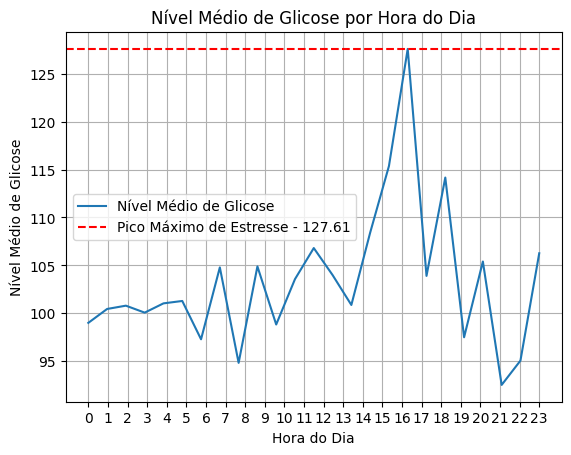

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import mysql.connector

# Função para simular a coleta de dados de glicose ao longo de um período de tempo
def simulate_glucose(duration_minutes, sample_interval_seconds, stress_times):
    # Inicialize uma lista para armazenar os níveis de glicose
    glucose_levels = []
    
    # Defina o tempo total de simulação em segundos
    total_duration_seconds = duration_minutes * 60
    
    # Defina o tempo inicial da simulação
    start_time = time.time()
    
    # Simule a coleta de dados de glicose até atingir a duração total
    while time.time() - start_time < total_duration_seconds:
        # Calcule o tempo decorrido desde o início da simulação
        elapsed_time = time.time() - start_time
        
        # Calcule o número de minutos decorridos desde o início da simulação
        elapsed_minutes = elapsed_time / 60
        
        # Calcule o número da hora atual ajustado para representar 24 horas
        current_hour = (elapsed_minutes / duration_minutes) * 24
        
        # Calcule o nível de glicose para esta hora
        if current_hour <= 6:  # Estabilizar as primeiras 6 horas
            glucose_level = 100 + np.random.normal(0, 5)
        else:
            glucose_level = 100 + np.random.normal(0, 20)
        
        # Verifique se há um pico de estresse neste momento
        for stress_time in stress_times:
            if current_hour >= stress_time and current_hour < stress_time + 1:
                glucose_level += np.random.uniform(20, 40)
        
        # Certifique-se de que os valores de glicose não sejam negativos
        glucose_level = max(glucose_level, 0)
        
        # Adicione o nível de glicose à lista
        glucose_levels.append(glucose_level)
        
        # Aguarde o intervalo de amostragem antes da próxima coleta de dados
        time.sleep(sample_interval_seconds)
    
    return glucose_levels

# Função para calcular a média da glicose por hora do dia
def calculate_glucose_per_hour(glucose_levels):
    # Divida os dados de glicose em intervalos representando cada hora do dia
    glucose_per_hour = [np.mean(glucose_levels[i:i+12]) for i in range(0, len(glucose_levels), 12)]
    return glucose_per_hour

# Função para inserir os dados no banco de dados MySQL
def insert_data_to_mysql(glucose_levels):
    # Estabelecer conexão com o banco de dados MySQL
    conn = mysql.connector.connect(
        host="localhost",
        user="nogueira",
        password="1234",
        database="glicose"
    )
    cursor = conn.cursor()
    
    # Criar a tabela se não existir
    cursor.execute('''CREATE TABLE IF NOT EXISTS glucose_data (
                        id INT AUTO_INCREMENT PRIMARY KEY,
                        glucose_level FLOAT
                      )''')
    
    # Inserir os dados de glicose na tabela
    for glucose_level in glucose_levels:
        cursor.execute("INSERT INTO glucose_data (glucose_level) VALUES (%s)", (glucose_level,))
    
    # Commit as mudanças e feche a conexão
    conn.commit()
    conn.close()

# Horários de estresse com picos de glicose (em horas)
stress_times = [14, 16, 18]

# Simulação da coleta de dados de glicose ao longo de um período de tempo especificado
glucose_levels = simulate_glucose(5, 1, stress_times)  # Simular 5 minutos com intervalo de amostragem de 1 segundo

# Inserir os dados no banco de dados MySQL
insert_data_to_mysql(glucose_levels)

# Calculando a média da glicose por hora do dia
glucose_per_hour = calculate_glucose_per_hour(glucose_levels)

# Encontrando o máximo entre os valores de glicose nos horários de estresse
max_pico_glicose = max(glucose_per_hour)

# Plotando o gráfico da glicose por hora
plt.plot(range(len(glucose_per_hour)), glucose_per_hour, label='Nível Médio de Glicose')
plt.xlabel('Hora do Dia')
plt.ylabel('Nível Médio de Glicose')
plt.title('Nível Médio de Glicose por Hora do Dia')
plt.xticks(np.linspace(0, len(glucose_per_hour) - 1, num=24), range(24))

# Adicionando linha pontilhada horizontal no pico máximo de glicose nos horários de estresse
plt.axhline(y=max_pico_glicose, color='r', linestyle='--', label=f'Pico Máximo de Estresse - {max_pico_glicose:.2f}')

plt.grid(True)
plt.legend()
plt.show()
